# MI-ADM: first home assignment

  * **Deadline**: 19/03/2018, -2 points for a late submission, hard deadline is the first day of the exam period.
  * **What to submit**: Just this notebook with you code and texts, not the dataset! Please run "Kernel>Restart & Clear Output" before submitting.
  * **How to submit**: Preferred way is to start a repository (for both home assignments) on https://gitlab.fit.cvut.cz and add me as a reporter (my username is kloudkar), however, you can send this jupyter notebook by email (*do not send the dataset!!*).

Generally speaking, the goal of this assignment is to use kNN algorithm to get the best possible result (in terms of classification accuracy) when applied on the MNIST dataset.

What you HAVE TO do:
  * Apply the kNN algorithm as implemented in sklearn to the MNIST dataset.
  * Come up with at least one new reasonable feature (extracting features ...).
  * Select at least two parameters of the model and tune them using [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html).
  * Write down a (one paragraph long) conclusion into the very last cell of this notebook.

If you do all this properly you will be given 4 points out of possible 6.

To get more do some extra work to (try to) improve the result, here are some suggestions:
  * Try to extract more features, read some papers or blogs to get an inspiration (google something like "image data feature extraction").
  * Try to tune more parameters of the model.
  * Try to use the decision tree algorithm (it is a topic of our next tutorial class) and compare the results.
  * Try to run PCA to lower the number of features.
  * Sigh in at kaggle.com and apply your resulting model to the test dataset in [the MNIST competition](https://www.kaggle.com/c/digit-recognizer).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv('train.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=570)
X = dtrain.drop(['label'], axis = 1, errors = 'ignore')
y = dtrain.label
Xtest = dtest.drop(['label'], axis = 1, errors = 'ignore')
ytest = dtest.label

# k-nearest neighbors

* default params:

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)[source]

In [4]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [5]:
display(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Evaluating the model
* This part without change was taken from the laboratory work.

In [ ]:
ypredict = knn.predict(Xtest)

In [ ]:
# store the predicted response values
# I comment it, becouse it worked very slow

res = pd.DataFrame(np.matrix([ypredict, ytest, ypredict - ytest]).T)
res.columns = ['predict', 'real', 'diff']
print('number of well predicted = {0} out of {1} ({2:.4f} %)'.
      format(res[res['diff'] == 0].shape[0], ytest.shape[0], 100*res[res['diff'] == 0].shape[0]/ytest.shape[0]))

#### Common evaluation metric using metrics from sklearn

In [7]:
from sklearn import metrics

In [8]:
print(metrics.accuracy_score(ytest, knn.predict(Xtest)))

0.9676190476190476


### Evaluate a score by cross-validation

* default params:

sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)

In [15]:
data = pd.read_csv('train.csv')
X = data.drop(['label'], axis = 1, errors = 'ignore')
y = data.label

In [16]:
scores = cross_val_score(knn, X, y, cv=3, n_jobs = -1)

In [ ]:
scores

In [18]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.00)


### Changing parameters.
In next part was choosing the algorithm - BallTree and changed the param - leaf size. 

leaf_size : positive integer (default = 40)
Number of points at which to switch to brute-force. Changing leaf_size will not affect the results of a query, but can significantly impact the speed of a query and the memory required to store the constructed tree. The amount of memory needed to store the tree scales as approximately n_samples / leaf_size. 

cProfile was used to measure the working time of the procedure.

In [9]:
#import cProfile
lf = [20, 30]

In [10]:
def knn_leaf_size(X, y, lf):
    scores = []
    knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size = lf)
    display(knn)
    scores = cross_val_score(knn, X, y, cv=3, n_jobs = -1)
    print('leaf size: ', lf, '\nScores:' )
    print(scores)
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    return scores

In [11]:
lf_list = []
for i in lf:
    #cProfile.run('lf_list.append(knn_leaf_size(X, y, i))')
    # if Profile does not install call it like a usual procedure
    lf_list.append(knn_leaf_size(Xtest, ytest, i))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

leaf size:  20 
Scores:
[0.94204967 0.94628571 0.94881327]
Accuracy: 0.9457 (+/- 0.0056)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

leaf size:  30 
Scores:
[0.94204967 0.94628571 0.94881327]
Accuracy: 0.9457 (+/- 0.0056)


### Changing metric parameter.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

* minkowski - sum(|x - y|^p)^(1/p)
* chebyshev - max(|x - y|)
* manhattan - sum(|x - y|)
* hamming - N_unequal(x, y) / N_tot
* canberra - sum(|x - y| / (|x| + |y|))
* braycurtis - sum(|x - y|) / (sum(|x|) + sum(|y|))


In [12]:
metrics_arr = ['minkowski', 'chebyshev', 'manhattan', 'hamming', 'canberra', 'braycurtis']

In [13]:
def knn_metrics(X, y, metric_param):
    scores = []
    knn = KNeighborsClassifier(algorithm='ball_tree', metric= metric_param)
    print(knn)
    scores = cross_val_score(knn, Xtest, ytest, cv=3)
    print('Metric: ', metric_param, '\nScores: ', scores)
    print("\nAccuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    return scores

In [14]:
metric_list = []
for m in metrics_arr:
    metric_list.append(knn_metrics(X, y, m))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Metric:  minkowski 
Scores:  [0.94204967 0.94628571 0.94881327]

Accuracy: 0.9457 (+/- 0.0056)
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Metric:  chebyshev 
Scores:  [0.66942621 0.67485714 0.68744638]

Accuracy: 0.6772 (+/- 0.0151)
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Metric:  manhattan 
Scores:  [0.93320011 0.93485714 0.93651701]

Accuracy: 0.9349 (+/- 0.0027)
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Metric:  hamming 
Scores:  [0.69426206 0.

# The idea of processing (and searching for a new feature) is as follows:
* 1) make image segmentation, for example, for an image 28x28 pixels, could be selected 6 segments (7x7)
* 2) for each segment, calculate the value (it could be normalized) equal to the sum of all the pixel values in this segment. For this, white and black pixels should not be deleted.
* 3) Then could be selected all the raws with the same label and calculate the average values for each segment.


The resulting array of 16 values will contain the mean values for all segments of the same class. Next, for a new image, could be calculated the value of the segments and find to what class it is closer.

* This part is the procedure for segments.
* // Start pixel - it's the first pixel in every segment. 

In [15]:
start_pix = []
for i in range(0,4):
    for j in range (0,4):
        start_pix.append(i*196+j*7)

In [16]:
def segmentation(data): 
    segment_arr = []
    segment = []
    for k in range(0, 16):
        for i in range(0, 7):
            for j in range(0,7):
                segment.append(data[(28*i + j) + start_pix[k] + 1])
                segment_avg = sum(segment) / float(len(segment))
        segment_arr.append(segment_avg)
    return segment_arr

* add_longest will return a new list, where each element is a sum of elements in the same position in two lists.

In [17]:
from itertools import starmap, zip_longest
from operator import add

def add_longest(l1, l2):
    return list(starmap(add, zip_longest(l1, l2, fillvalue=0)))


In [18]:
# for data, where label =0
data_0 = data[data.label == 0]
segments_all_for_0 = []
for i in range (len(data_0.index)):
    segments_all_for_0 = add_longest(segmentation(data_0.values[i]), segments_all_for_0)
    
normal_segments_all_for_0 = []
for i in range(len(segments_all_for_0)):
    normal_segments_all_for_0.append(segments_all_for_0[i]/len(data_0.index))
    

In [19]:
# for data, where label =9
data_9 = data[data.label == 9]
segments_all_for_9 = []
for i in range (len(data_9.index)):
    segments_all_for_9 = add_longest(segmentation(data_9.values[i]), segments_all_for_9)
normal_segments_all_for_9 = []
for i in range(len(segments_all_for_9)):
    normal_segments_all_for_9.append(segments_all_for_9[i]/len(data_9.index))

In [20]:
#two examles, just one raw with val. 9 and val. 0
example_for_9 = segmentation(data.values[41975])
example_for_0 = segmentation(data.values[1])

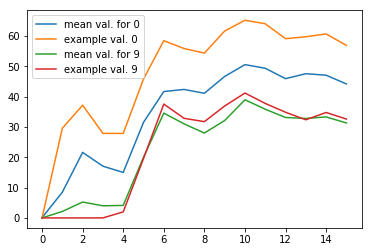

In [21]:
plt.gcf().clear()
plt.plot(range(len(normal_segments_all_for_0)), normal_segments_all_for_0, label='mean val. for 0')
plt.plot(range(len(example_for_0)), example_for_0 , label='example val. 0')
plt.plot(range(len(normal_segments_all_for_9)), normal_segments_all_for_9 , label='mean val. for 9')
plt.plot(range(len(example_for_9)), example_for_9 , label='example val. 9')
plt.legend()
plt.show()

* As can be seen from the graph for 9, it almost coincides with the one obtained with averaging. 0 preserves the form. Further, you can apply algorithms for example as for time series or leave the resulting values as a set of characteristics.

### Decision tree
In this part was used a learning method - decision tree. Also was used GridSearchCV to find best parameter values for an estimator. Changing parameters are max_depth and max_features.

max_depth :
The maximum depth of the tree.

max_features : 
The number of features to consider when looking for the best split:

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

In [23]:
data = pd.read_csv('train.csv')
X = data.drop(['label'], axis = 1, errors = 'ignore')
y = data.label

In [24]:
tree_params = {'max_depth': range(10,25), 'max_features': range(2,15)}
clf = tree.DecisionTreeClassifier()

In [25]:
tree_grid = GridSearchCV(clf, tree_params, cv=3, n_jobs=-1, verbose=True)

In [26]:
# Fit the model using X as training data and y as target values
tree_grid.fit(X, y)

Fitting 3 folds for each of 195 candidates, totalling 585 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 585 out of 585 | elapsed: 11.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(10, 25), 'max_features': range(2, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

* showing best params and best score

In [27]:
tree_grid.best_params_

{'max_depth': 19, 'max_features': 14}

In [28]:
tree_grid.best_score_

0.7920714285714285

During this work was studied knn algorithm and possible parameters of it. Also was showed how changing the value of parameters effect t accuracy of clustering.  
* parameter 'leaf_size':
As it was written in the documentation the parameter  leaf_size not affect the results but affect the time. Not enough tests have done to determine how exactly the parameter affects the time.
* parameter 'metric':
The choice of the metric has a huge effect on accuracy (also for the duration of the work). By default, the algorithm uses the distance of the Minkowski, which gives one of the best results.


It is also proposed a method for working with images based on segmentation.
Was implemented the decision tree algorithm. To select the best parameters was used a grid, and for evaluating was using cross-validation.